# Traditonal AI (With Solutions)

In this notebook, you will learn how to implement and compare the search algorithms: Breadth-First Search (BFS), Depth-First Search (DFS), and A* Search, along with their applications in problem-solving.

## Authors
- Xiao Fu

## Learning Outcomes

- **Breadth-First Search (BFS):** Learn how BFS explores graphs level by level and how it can be used to find the shortest path in unweighted graphs.
- **Depth-First Search (DFS):** Understand how DFS explores as far as possible along each branch before backtracking and its applications in traversing trees and graphs.


## Source
- https://medium.com/@msgold/using-python-to-create-and-solve-mazes-672285723c96
- https://matteo-tosato7.medium.com/exploring-the-depths-solving-mazes-with-a-search-algorithm-c15253104899
- https://medium.com/swlh/solving-mazes-with-depth-first-search-e315771317ae
- https://medium.com/@luthfisauqi17_68455/artificial-intelligence-search-problem-solve-maze-using-breadth-first-search-bfs-algorithm-255139c6e1a3


## Task

1. Create maze
2. Implement DFS
3. Implement BFS

## Importing Libraries

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random
import heapq
from queue import Queue
from abc import ABC, abstractmethod
import time

## Creating Maze

A maze can be represented as a two-dimensional array, where walls are denoted by $1$ and paths by $0$.

In [9]:
def create_maze(dim):
    # Create a grid filled with walls
    maze = np.ones((dim*2+1, dim*2+1))

    # Define the starting point
    x, y = (0, 0)
    maze[2*x+1, 2*y+1] = 0

    # Initialize the stack with the starting point
    stack = [(x, y)]
    while len(stack) > 0:
        x, y = stack[-1]

        # Define possible directions
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        random.shuffle(directions)

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if nx >= 0 and ny >= 0 and nx < dim and ny < dim and maze[2*nx+1, 2*ny+1] == 1:
                maze[2*nx+1, 2*ny+1] = 0
                maze[2*x+1+dx, 2*y+1+dy] = 0
                stack.append((nx, ny))
                break
        else:
            stack.pop()
            
    # Create an entrance and an exit
    maze[1, 0] = 0
    maze[-2, -1] = 0

    return maze

In [10]:
temp_maze = create_maze(5)
temp_maze

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.],
       [1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

## Drawing the Maze 


In [11]:
def draw_maze(maze, path=None):
    fig, ax = plt.subplots(figsize=(10,10))
    
    # Set the border color to white
    fig.patch.set_edgecolor('white')
    fig.patch.set_linewidth(0)

    ax.imshow(maze, cmap=plt.cm.binary, interpolation='nearest')
    
    # Draw the solution path if it exists
    if path is not None:
        x_coords = [x[1] for x in path]
        y_coords = [y[0] for y in path]
        ax.plot(x_coords, y_coords, color='red', linewidth=2)
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Draw entry and exit arrows
    ax.arrow(0, 1, .4, 0, fc='green', ec='green', head_width=0.3, head_length=0.3)
    ax.arrow(maze.shape[1] - 1, maze.shape[0]  - 2, 0.4, 0, fc='blue', ec='blue', head_width=0.3, head_length=0.3)
    
    plt.show()

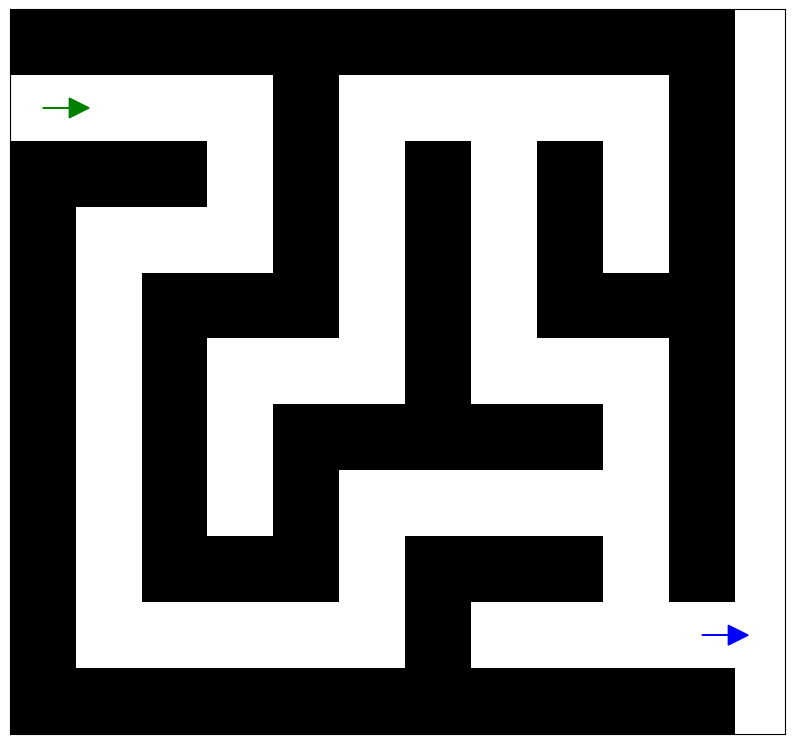

In [5]:
draw_maze(temp_maze)

## PathFinder

The `PathFinder` class is an abstract base class designed to provide a common structure for implementing various pathfinding algorithms in a maze. It serves as a blueprint for subclasses like BFS, DFS, and A* pathfinders, encapsulating shared properties and behaviors.

### Purpose

- **Maze Representation**: Accepts a 2D NumPy array where `0` represents a passable path and `1` represents a wall.
- **Start and End Points**: Initializes default starting and ending positions within the maze, typically avoiding the outer walls.
- **Movement Directions**: Defines possible movements in four cardinal directions—up, down, left, and right.
- **Visited Cells Tracking**: Utilizes a boolean array to keep track of visited cells.

### Key Components

- **Initialization (`__init__`)**:
  - Sets up the maze and initial parameters.
  - Initializes the `visited` array to track explored cells.
  - Marks the starting position as visited.

- **Abstract Method (`find_path`)**:
  - Declared using the `@abstractmethod` decorator, requiring subclasses to implement this method.
  - Defines the interface for the pathfinding logic to find a path from the start to the end point.


By extending the `PathFinder` class, you can create specialized pathfinding algorithms that leverage the common setup while focusing on the unique aspects of each algorithm.


In [12]:
class PathFinder(ABC):
    def __init__(self, maze):
        """
        Initialize the PathFinder with a maze.

        Parameters:
        - maze (numpy.ndarray): 2D array representing the maze where 0 is passable and 1 is a wall.
        """
        self.maze = maze
        self.start = (1, 1)
        self.end = (maze.shape[0] - 2, maze.shape[1] - 2)
        self.directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        self.visited = np.zeros_like(maze, dtype=bool)
        self.visited[self.start] = True

    @abstractmethod
    def find_path(self):
        """
        Abstract method to find a path from start to end in the maze.
        Must be implemented by subclasses.
        """
        pass
    
    def get_visited_count(self):
        """
        Count all of the visited points to analyze the performance of the algorithms.

        Returns:
        - int: The total number of points visited during pathfinding.
        """
        return np.sum(self.visited)

## Breadth-First Search (BFS)

The **Breadth-First Search (BFS)** algorithm is used to search a graph data structure for a node that meets a set of criteria. It starts at the root of the graph and visits all nodes at the current depth level before moving on to nodes at the next depth level.

### How BFS Works

1. **Start at the root node**.
2. **Visit all neighbor nodes** at the current depth.
3. **Proceed to the next level** of nodes.
4. **Repeat** until the goal node is found or all nodes are visited.

### Characteristics of BFS

- Explores nodes level by level.
- Uses a **queue** to keep track of nodes to visit.
- Guarantees the **shortest path** in an unweighted graph.

In [13]:
from queue import Queue
import numpy as np

class BFSPathFinder(PathFinder):
    def find_path(self):
        """
        Find the shortest path using Breadth-First Search (BFS).

        Returns:
            list[(int,int)] | None: path from start to end (inclusive), or None if unreachable.
        """
        # 重置/初始化访问表
        self.visited = np.zeros_like(self.maze, dtype=bool)
        self.visited[self.start] = True

        q = Queue()
        q.put(self.start)

        # 记录父节点以便回溯路径
        came_from = {self.start: None}

        H, W = self.maze.shape

        while not q.empty():
            x, y = q.get()

            # 找到终点则停止
            if (x, y) == self.end:
                break

            # 扩展四邻域
            for dx, dy in self.directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < H and 0 <= ny < W \
                   and not self.visited[nx, ny] \
                   and self.maze[nx, ny] == 0:     # 只能走通路(0)
                    self.visited[nx, ny] = True
                    came_from[(nx, ny)] = (x, y)
                    q.put((nx, ny))

        # 若终点从未被发现
        if self.end not in came_from:
            return None

        # 回溯重建路径（end → start）
        path = []
        cur = self.end
        while cur is not None:
            path.append(cur)
            cur = came_from[cur]
        path.reverse()
        return path

In [14]:
class DFSPathFinder(PathFinder):
    def find_path(self):
        """
        Depth-First Search (DFS). Not guaranteed to be shortest.
        """
        self.visited = np.zeros_like(self.maze, dtype=bool)
        self.visited[self.start] = True

        stack = [self.start]
        came_from = {self.start: None}
        H, W = self.maze.shape

        while stack:
            x, y = stack.pop()
            if (x, y) == self.end:
                break

            for dx, dy in self.directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < H and 0 <= ny < W \
                   and not self.visited[nx, ny] \
                   and self.maze[nx, ny] == 0:
                    self.visited[nx, ny] = True
                    came_from[(nx, ny)] = (x, y)
                    stack.append((nx, ny))

        if self.end not in came_from:
            return None

        path = []
        cur = self.end
        while cur is not None:
            path.append(cur)
            cur = came_from[cur]
        path.reverse()
        return path

BFS: path length = 25 | visited cells = 30


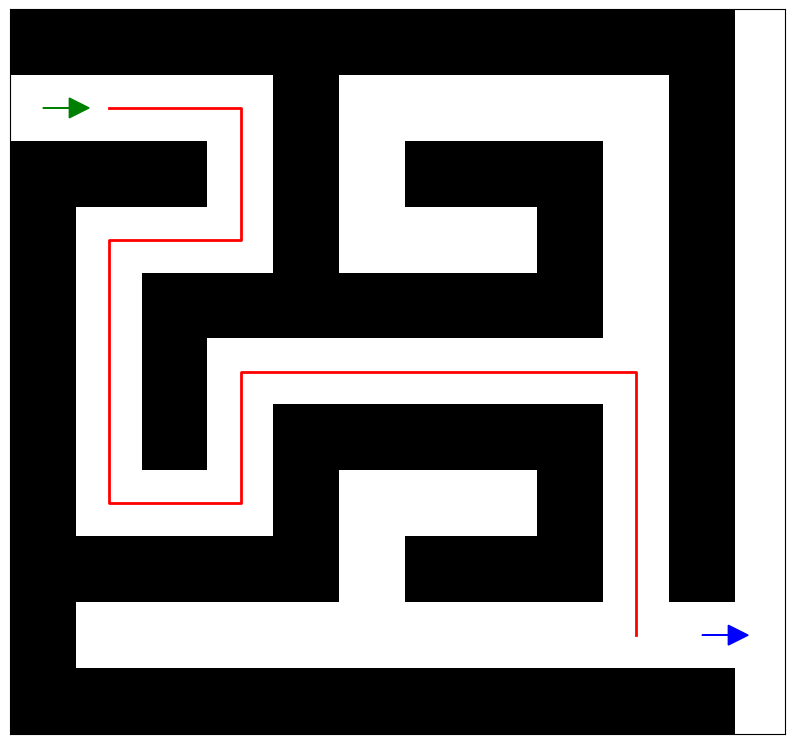

DFS: path length = 25 | visited cells = 38


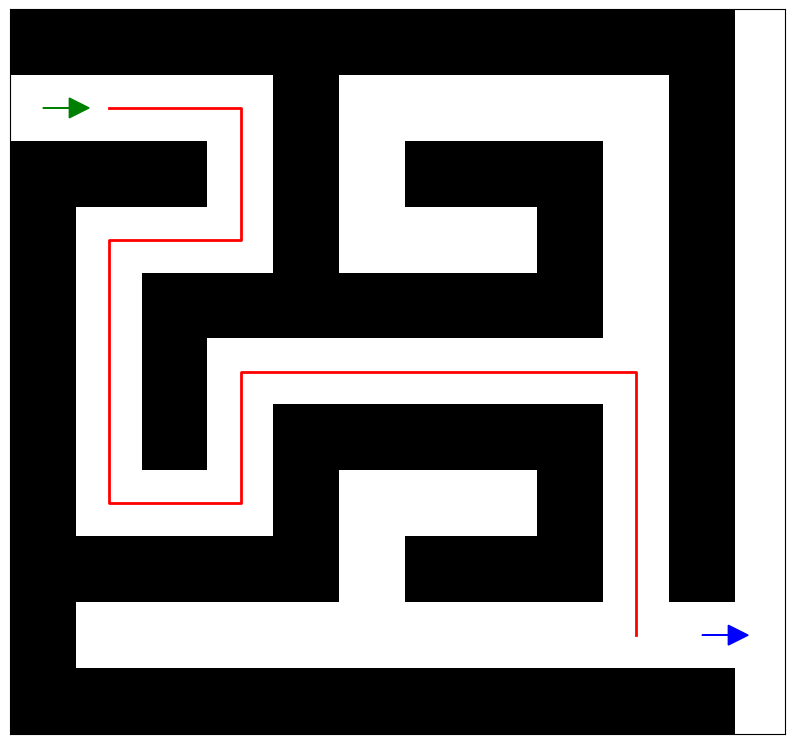

In [17]:
maze = create_maze(5) 

bfs_solver = BFSPathFinder(maze)
bfs_path = bfs_solver.find_path()
print("BFS: path length =", len(bfs_path) if bfs_path else None,
      "| visited cells =", bfs_solver.get_visited_count())
draw_maze(maze, bfs_path)

dfs_solver = DFSPathFinder(maze)
dfs_path = dfs_solver.find_path()
print("DFS: path length =", len(dfs_path) if dfs_path else None,
       "| visited cells =", dfs_solver.get_visited_count())
draw_maze(maze, dfs_path)

## Depth-First Search (DFS)

**Depth-First Search (DFS)** is a graph/tree traversal algorithm that explores as far as possible along each branch before backtracking. It follows a path as far as it can until it either reaches the goal or has nowhere else to go.

### How DFS Works

1. **Start at the root node**.
2. **Explore as deep as possible** along each branch.
3. **Backtrack** when no unvisited adjacent nodes remain.
4. **Repeat** until the goal node is found or all nodes are visited.

### Characteristics of DFS

- Explores as deep as possible before backtracking.
- Uses a **stack** (often via recursion) to keep track of nodes.
- Does **not guarantee** the shortest path.



It's like running as far as you can in one direction until you hit a wall. This helps clear up any lingering confusion.


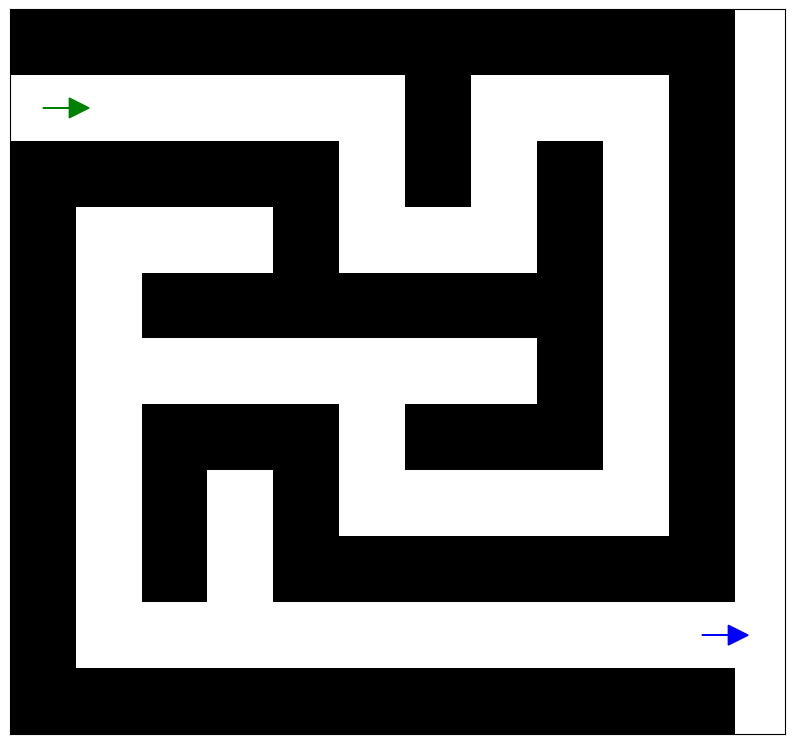

DFS Path Length: 41
Visited Cells: 49


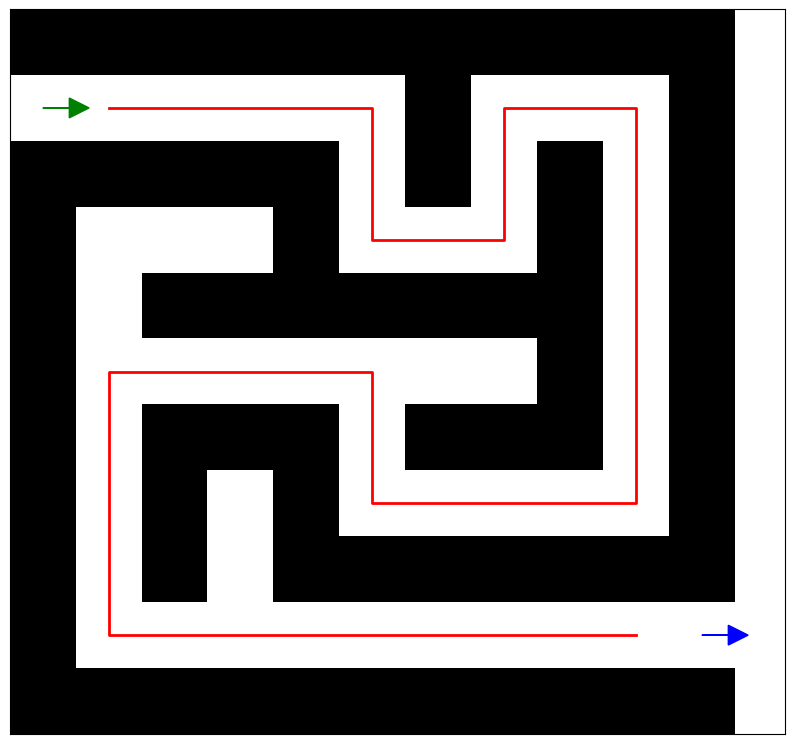

In [19]:
class DFSPathFinder(PathFinder):
    def find_path(self):
        """
        Find a path using Depth-First Search (DFS).

        Returns:
            list of tuples representing the path from start to end,
            or None if no path exists.
        """

        # 初始化访问矩阵
        self.visited = np.zeros_like(self.maze, dtype=bool)
        self.visited[self.start] = True

        # 使用栈来实现 DFS
        stack = [self.start]

        # 用于记录每个节点的父节点，用于回溯路径
        came_from = {self.start: None}

        H, W = self.maze.shape

        # 循环直到栈为空
        while stack:
            x, y = stack.pop()

            # 如果到达终点
            if (x, y) == self.end:
                break

            # 遍历四个方向（上、下、左、右）
            for dx, dy in self.directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < H and 0 <= ny < W:            # 不越界
                    if not self.visited[nx, ny] and self.maze[nx, ny] == 0:
                        self.visited[nx, ny] = True        # 标记访问
                        came_from[(nx, ny)] = (x, y)       # 记录父节点
                        stack.append((nx, ny))             # 压入栈中

        # 若终点未被访问，表示无路可达
        if self.end not in came_from:
            return None

        # 回溯重建路径
        path = []
        cur = self.end
        while cur is not None:
            path.append(cur)
            cur = came_from[cur]
        path.reverse()
        return path

# 创建迷宫
maze = create_maze(5)
draw_maze(maze)

# 执行 DFS 寻路
dfs_solver = DFSPathFinder(maze)
dfs_path = dfs_solver.find_path()

print("DFS Path Length:", len(dfs_path) if dfs_path else "No path")
print("Visited Cells:", dfs_solver.get_visited_count())

# 可视化路径
draw_maze(maze, dfs_path)


## Comparison between the two methods

Maze Size: 10
BFS Time: 0.0010s, Visited Nodes: 182
DFS Time: 0.0005s, Visited Nodes: 193
---
Maze Size: 25
BFS Time: 0.0025s, Visited Nodes: 732
DFS Time: 0.0046s, Visited Nodes: 1232
---
Maze Size: 50
BFS Time: 0.0159s, Visited Nodes: 3216
DFS Time: 0.0103s, Visited Nodes: 4491
---
Maze Size: 75
BFS Time: 0.0370s, Visited Nodes: 8680
DFS Time: 0.0191s, Visited Nodes: 10083
---
Maze Size: 100
BFS Time: 0.0294s, Visited Nodes: 6906
DFS Time: 0.0126s, Visited Nodes: 6776
---
Maze Size: 150
BFS Time: 0.0937s, Visited Nodes: 21314
DFS Time: 0.0880s, Visited Nodes: 44080
---
Maze Size: 200
BFS Time: 0.1292s, Visited Nodes: 27998
DFS Time: 0.1591s, Visited Nodes: 78550
---


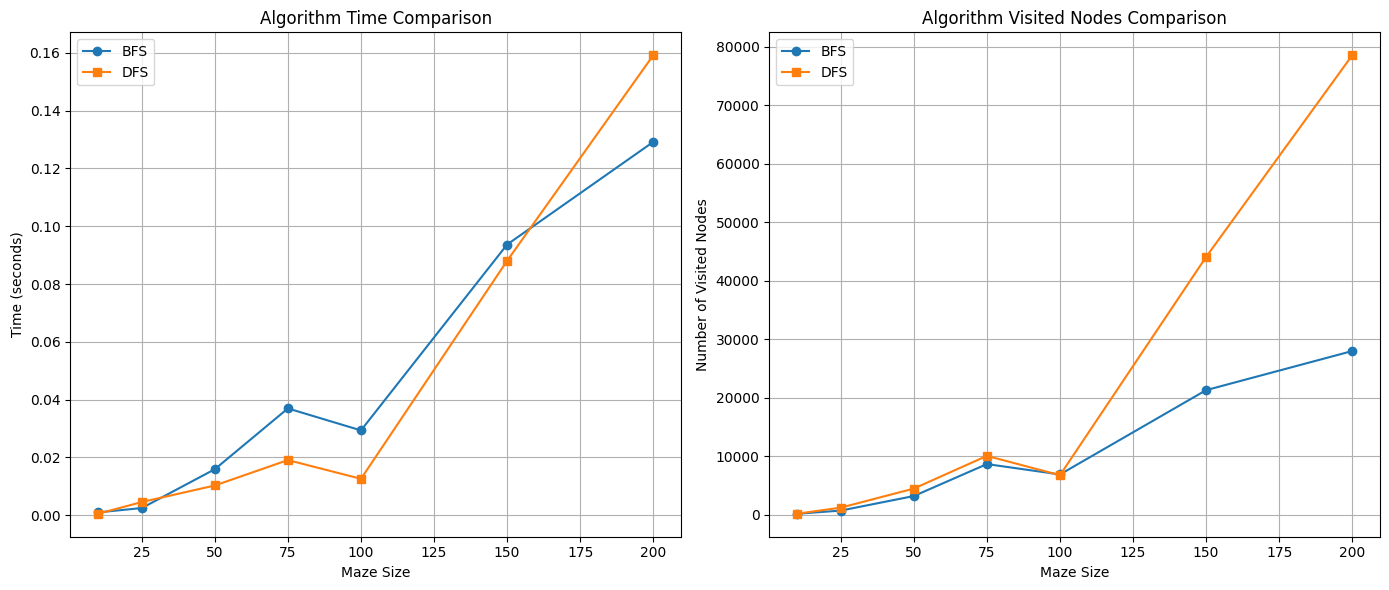

In [20]:
maze_sizes = [10,25,50,75,100,150,200]

# Lists to store results
bfs_times = []
dfs_times = []
astar_times = []

bfs_visited_counts = []
dfs_visited_counts = []
astar_visited_counts = []

for size in maze_sizes:
    maze = create_maze(size)
    
    # BFS
    bfs = BFSPathFinder(maze)
    start = time.time()
    bfs_path = bfs.find_path()
    end = time.time()
    bfs_time = end - start
    bfs_visited = bfs.get_visited_count()
    bfs_times.append(bfs_time)
    bfs_visited_counts.append(bfs_visited)
    
    # DFS
    dfs = DFSPathFinder(maze)
    start = time.time()
    dfs_path = dfs.find_path()
    end = time.time()
    dfs_time = end - start
    dfs_visited = dfs.get_visited_count()
    dfs_times.append(dfs_time)
    dfs_visited_counts.append(dfs_visited)

    print(f"Maze Size: {size}")
    print(f"BFS Time: {bfs_time:.4f}s, Visited Nodes: {bfs_visited}")
    print(f"DFS Time: {dfs_time:.4f}s, Visited Nodes: {dfs_visited}")
    print("---")

# Plotting Time and Visited Nodes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Time Plot
axs[0].plot(maze_sizes, bfs_times, marker='o', label='BFS')
axs[0].plot(maze_sizes, dfs_times, marker='s', label='DFS')
axs[0].set_xlabel('Maze Size')
axs[0].set_ylabel('Time (seconds)')
axs[0].set_title('Algorithm Time Comparison')
axs[0].legend()
axs[0].grid(True)

# Visited Nodes Plot
axs[1].plot(maze_sizes, bfs_visited_counts, marker='o', label='BFS')
axs[1].plot(maze_sizes, dfs_visited_counts, marker='s', label='DFS')
axs[1].set_xlabel('Maze Size')
axs[1].set_ylabel('Number of Visited Nodes')
axs[1].set_title('Algorithm Visited Nodes Comparison')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

## An example of path finder

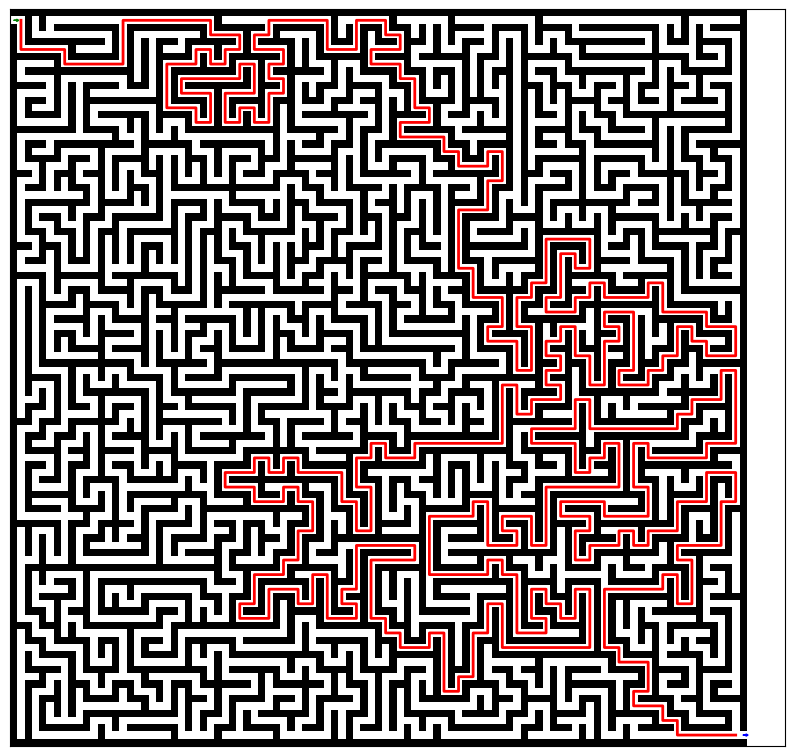

In [30]:
maze = create_maze(50)
bfs_pf = BFSPathFinder(maze)
bfs_pf_path = bfs_pf.find_path()
draw_maze(maze, bfs_pf_path)


## Comparison Summary

| Algorithm | Data Structure Used | Shortest Path Guarantee    | Informed Search |
|-----------|---------------------|----------------------------|-----------------|
| **BFS**   | Queue               | Yes (in unweighted graphs) | No              |
| **DFS**   | Stack or Recursion  | No                         | No              |

---

## Conclusion

Understanding these search algorithms is crucial for efficiently solving various graph-related problems. BFS and DFS are foundational algorithms that explore graphs differently.